In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Gravity_Acc=9.81 #gravity accleration
DataX=[]
DataY=[]
Pairs=np.array([("Angle","Velocity")])
Direction=True

In [3]:
Barrier=[75,100,300]
Landing_Zone=[50,70,0]
VelocityRange=[80,100,1]
AngleRange=[85,90,1]
TimeRange=[0,50,0.1] #StartTime,EndTime,Step

It is definition of lines that will draw the Barrier

In [4]:
Line1X=np.full(Barrier[2],Barrier[0])
Line1Y=np.arange(0,Barrier[2],1)
Line2X=np.arange(Barrier[0],Barrier[1],1)
Line2Y=np.full(Barrier[1]-Barrier[0],Barrier[2])
Line3X=np.full(Barrier[2],Barrier[1])
Line3Y=np.arange(0,Barrier[2],1)

In [5]:
# Calculation of X coordinate of Value
def X_coordinate (Value,Angle):
    return Value*math.cos(math.radians(Angle))

# Calculation of Y coordinate of Value
def Y_coordinate (Value,Angle):
    return Value*math.sin(math.radians(Angle))

def TrajectoryPointX (V,T,Angle,Direction,StartX):
    if Direction:
        return StartX+X_coordinate(V,Angle)*T
    else:
        return 2*StartX-X_coordinate(V,Angle)*T

# Calculation of the Reflection --- DOESN'T WORK ---
def TrajectoryPointY (V,T,Angle,Reflection,TimeY,StartY):
    if Reflection:
        return StartY+Y_coordinate(V*0.75,Angle)*(T-TimeY)-0.5*Gravity_Acc*(T-TimeY)*(T-TimeY)
    else:
        return Y_coordinate(V,Angle)*T-0.5*Gravity_Acc*T*T

In [6]:
def XYcalc (Velocity,Angle,StartX,StartY,TimeY,StartTime,EndTime,Step):
    Direction=True
    LandingCheck=False
    Reflection=False
    for Time in np.arange(StartTime,EndTime,Step):
        x=TrajectoryPointX(Velocity,Time,Angle,Direction,StartX)
        y=TrajectoryPointY(Velocity,Time,Angle,Reflection,TimeY,StartY)
        
        if x > Barrier[0] and y > Barrier[2]: #point is above the barrier
            Above=True
            Bellow=False
        elif x < Barrier[0] and y < Barrier[2]: #point is bellow the barrier
            Above=False
            Bellow=True

        if x > Barrier[0] and y < Barrier[2] and Bellow: #point is in the barrier and comes from side
            Direction=False #direction will change
            Reflection=False #no reflection
            StartX=x
            
        if x > Barrier[0] and y < Barrier[2] and x < Barrier[1] and y < Barrier[2]and Above: #point is in the barrier and comes from top
            Direction=True #direction will not change
            Reflection=True
            StartY=y
            TimeY=Time            

        if ((x > Landing_Zone[0] and y < 0) and (x < Landing_Zone[1] and y < 0)): #getting to the LandingZone
            LandingCheck=True
            break
            
        if y < 0:
            break

        TmpX.append(x)
        TmpY.append(y)
        
    return TmpX,TmpY,LandingCheck

In [7]:
for Velocity in np.arange(VelocityRange[0],VelocityRange[1],VelocityRange[2]):    
    for Angle in np.arange(AngleRange[0],AngleRange[1],AngleRange[2]):
        TmpX=[]
        TmpY=[]

        TmpX,TmpY,LandingCheck=XYcalc(Velocity,Angle,0,0,0,TimeRange[0],TimeRange[1],TimeRange[2])
        
#        if LandingCheck:
        DataX=DataX+TmpX
        DataY=DataY+TmpY


In [8]:
print(Pairs)

[['Angle' 'Velocity']]


<function matplotlib.pyplot.show(*args, **kw)>

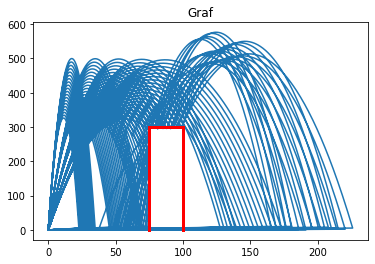

In [9]:
plt.title('Graf')
plt.plot(DataX, DataY)
plt.plot(Line1X,Line1Y,color='red',linewidth=3)
plt.plot(Line2X,Line2Y,color='red',linewidth=3)
plt.plot(Line3X,Line3Y,color='red',linewidth=3)
plt.show